## Read multiple AC-SAF files

Often datasets come as an ensemble of files representative of a single timestep. Xarray in Python has good options for dealing with multidimensional arrays and coordinates. 
Here we report an example for AC-SAF tropical tropospheric ozone dataset
https://acsaf.org/products/oto_o3tropo_cs.html

Each file contains a 2D field representative of a single month.
The whole dataset can be downloaded from the AC-SAF database at https://acsaf.org/offline_access.html


In [121]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path

# path joining version for other paths
path = '../AC-SAF_O3'
n_files=(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))

We now read the files in a row and create a new coordinate time.

In [122]:
data=xr.open_mfdataset("../AC-SAF_O3/*.nc",concat_dim=pd.Index(range(1,n_files),name='Time'))
prod=xr.open_mfdataset("../AC-SAF_O3/*.nc",concat_dim=pd.Index(range(1,n_files+1),name='Time'),group="PRODUCT")
data["tropospheric_O3"]=prod.tropospheric_O3

Finally, we select a single location with latitude and longitude index. The plot is hence a timeserie.

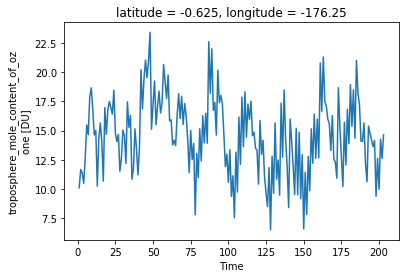

In [123]:
data1d=data.tropospheric_O3.isel(latitude=15,longitude=1)
data1d.plot()